<a href="https://colab.research.google.com/github/tyro2001/hello-world/blob/master/ML1_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

**Problem 1**

In [2]:
NUM_DRAWS = 1_000

draws = ss.expon.rvs(size=NUM_DRAWS)
results = {'MSE': dict(), "MAE" : dict()}
estimators = {'Mean  ': 1.0, 'Median': math.log(2)}

for name, y_hat in estimators.items():
    residuals = draws - y_hat
    rss = np.sum(np.power(residuals, 2))
    rsa = np.sum(np.abs(residuals))
    results['MSE'][name] = rss / NUM_DRAWS
    results['MAE'][name] = rsa / NUM_DRAWS

for measure in results:
    for name, result in results[measure].items():
        print(measure, name, result)
    print()




MSE Mean   1.0298061114411867
MSE Median 1.125904111300224

MAE Mean   0.731708791419112
MAE Median 0.6860906682734306



The mean works better for mean squared error (MSE), but the median is better for mean absolute error (MAE). 

**Problem 2**

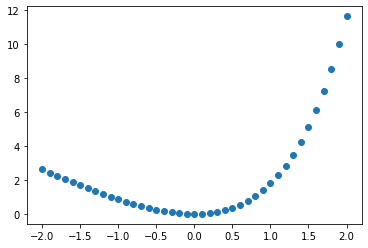

In [3]:
def loss(a, b, z):
    assert(a > 0)
    assert(b > 0)
    return b * (math.exp(a*z) - a*z - 1)

def part_a():
    a = 1.1  ## given
    b = 2.0  ## given
    step = .1
    loss_vec = list()
    z_vec = np.arange(-2, 2 + step, step)
    for z in z_vec:
        loss_vec.append(loss(a, b, z))

    plt.scatter(z_vec, loss_vec)
    plt.show()

part_a()

This loss function penalizes positive errors more than negative ones.

Part (b)


Use the iterated condintioning from class:


$E \left[ E \left[b\left(e^{a(Y-\mu(x))} - a(Y-\mu(x)) - 1\right)| X=x \right] \right]$


Since we are going to minimize to find $\mu(x)$ and $b>0$, I am just going to remove it.  I will also distribute the $a$


$E \left[ E \left[e^{aY} e^{-a\mu(x)} - aY + a\mu(x) - 1| X=x \right] \right]$


Now let's distribute the inner expectation:

$E \left[e^{-a\mu(x)} E \left[e^{aY}| X = x \right]  - a E \left[ Y|X=x \right] + a\mu(x) - 1 \right ]$


Remove the terms that don't rely on $\mu(x)\$:

$E \left[e^{-a\mu(x)} E \left[e^{aY}| X = x \right]  + a\mu(x)\right ]$


Let's let $ c = E \left[e^{aY}| X = x \right] $ and $ z = \mu(x)$ and minimize the following:

$f(z) = c e^{-az} + az$


$f^{'}(z) = -ca e^{-az} + a$

$f^{''}(z) = ca^2 e^{-az} > 0$


Set the first derivative equal to zero to get:

$ca e^{-az} = a => e^{-az} = c^{-1} => -az = -\log{c} => z = \frac{\log{c}}{a}$


Rewrite in the original terms:

$\mu(x) = \frac{\log{(E \left[e^{aY}| X = x \right])}}{a}$

Part (c)

Using the equation from the moment generating function in the problem we have:


$ E \left[e^{aY}| X = x \right] = e^{\beta x a+ \frac{1}{2}\sigma^2 a^2}$

Using the equation from part (b) we have:

$\mu(x) = \frac{\beta x a+ \frac{1}{2}\sigma^2 a^2}{a} = \beta x + \frac{1}{2}\sigma^2 a$

Part (d)

I made the following change to asymm_loss.py:

In [4]:
def f_yours(x):
    return beta*x + .5 * sigma**2 * a

and got the following results:

Average loss of the conditional expectation: 15.69  
Average loss of your method: 4.41

I have a lower average loss because conditional mean is optimal for a squared error loss function.  Mine is the optimal one for the loss function described in this exercise. 



**Problem 3**

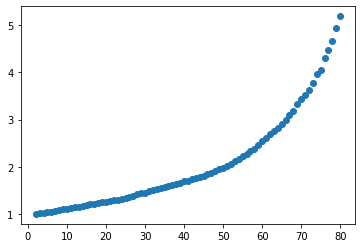

In [10]:
import statsmodels.api as sm

MAX_P = 80
NUM_ITERS = 100
NUM_POINTS = 100

## using beta on epsilon is a little
## bit of an abuse of common naming.
## just makes it eaiser.  
true_beta = np.zeros(MAX_P+1)
true_beta[0] = 1.0  ## epsilon
true_beta[1] = 4.0  ## X_1

mse_sums = np.zeros(MAX_P+1)
for i in range(NUM_ITERS):
    ## column zero will be the epsilons initially
    train_data = ss.norm.rvs(size = [NUM_POINTS, MAX_P+1])
    test_data  = ss.norm.rvs(size = [NUM_POINTS, MAX_P+1])
    train_y = train_data @ true_beta
    test_y  = test_data  @ true_beta

    ## now let's make column zero equal to 1.0
    train_data[:, 0] = 1.0
    test_data[:, 0] = 1.0

    for n in range(2, MAX_P+1):
        mod = sm.OLS(train_y, train_data[:, 0:n])
        res = mod.fit()
        test_y_hat = test_data[:, 0:n] @ res.params
        mse = np.mean(np.power(test_y - test_y_hat, 2))
        mse_sums[n] += mse

mse_avg = mse_sums / NUM_ITERS
plt.scatter(range(2, MAX_P+1), mse_avg[2:])
plt.show()
